# Using KNN

## Importing Libraries and Data

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# Importing the data (is treated)
df = pd.read_csv('data/BRAZIL_CITIES_REV2022_CLEANED.csv')

# Separing the data into features and target
X = df.drop('IDHM', axis=1)
y = df['IDHM']

# See the number of features adn target
print(f'Number of features: {X.shape[1]}')

Number of features: 64


## Training the Model

### KNN changing n_components of PCA and changing K-Fold

In [37]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold

# Applying the PCA to the data (1 to 19 components), applying the KNN Regressor and plotting the results
results = []
n_components = list(range(1, 20)) # Varying the number of components from 1 to 19
n_folds = list(range(2, 31)) # Varying the number of folds from 2 to 30
n_neighbors = list(range(1, 40, 2)) # Varying the number of neighbors from 1 to 39

# Varying both the n_components and n_folds
for n in n_components:
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X)
    for n_fold in n_folds:
        kf = KFold(n_splits=n_fold)
        for k in n_neighbors:
            knn = KNeighborsRegressor(n_neighbors=k)
            score = cross_val_score(knn, X_pca, y, cv=kf, scoring='r2').mean()  # Use r^2 as the scoring metric
            results.append([n, n_fold, k, score])  # Store the score

df_results = pd.DataFrame(results, columns=['n_components', 'n_folds', 'n_neighbors', 'r2_score'])

# Find the best result for each value of n_neighbors
best_results_per_neighbor = df_results.loc[df_results.groupby('n_neighbors')['r2_score'].idxmax()]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(best_results_per_neighbor['n_neighbors'], best_results_per_neighbor['r2_score'], marker='o', linestyle='-', color='b')

# Highlight the best overall result
best_result = best_results_per_neighbor.loc[best_results_per_neighbor['r2_score'].idxmax()]
plt.scatter(best_result['n_neighbors'], best_result['r2_score'], color='red', zorder=5)
plt.text(best_result['n_neighbors'], best_result['r2_score'], f'Best: {best_result["r2_score"]:.4f}', fontsize=12, ha='right')

plt.xlabel('Number of Neighbors')
plt.ylabel('R² Score')
plt.title('Best R² Score vs Number of Neighbors')
plt.grid(True)
plt.show()

# Extracting the best results
best_result = max(results, key=lambda x: x[3])  # Select the configuration with the highest r^2 score
print(f'Best R² score: {best_result[3]:.4f}, with n_components: {best_result[0]}, number of k-folds: {best_result[1]}, number of neighbors: {best_result[2]}')

### KNN changing only the n_components of PCA

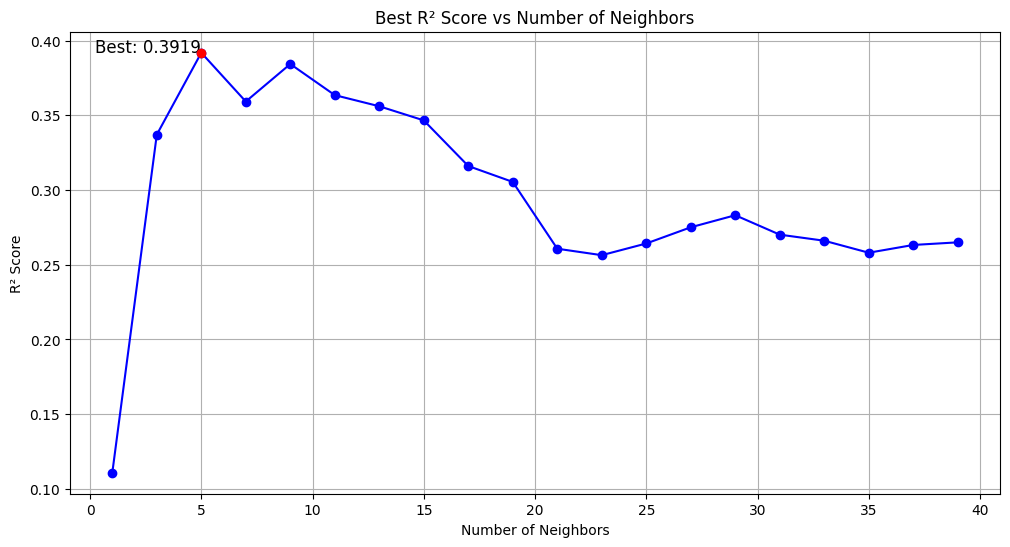

Best R² score: 0.3919, with n_components: 5, number of neighbors: 5


In [ ]:
from sklearn.model_selection import train_test_split

# Applying the PCA to the data (1 to 29 components), applying the KNN Regressor and plotting the results
results = []

# Separate the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Varying both the n_components and n_folds
for n in n_components:
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    for k in n_neighbors:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train_pca, y_train)
        score = knn.score(X_test_pca, y_test)  # Use r^2 as the scoring metric
        results.append([n, k, score])  # Store the score

df_results = pd.DataFrame(results, columns=['n_components', 'n_neighbors', 'r2_score'])

# Find the best result for each value of n_neighbors
best_results_per_neighbor = df_results.loc[df_results.groupby('n_neighbors')['r2_score'].idxmax()]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(best_results_per_neighbor['n_neighbors'], best_results_per_neighbor['r2_score'], marker='o', linestyle='-', color='b')

# Highlight the best overall result
best_result = best_results_per_neighbor.loc[best_results_per_neighbor['r2_score'].idxmax()]
plt.scatter(best_result['n_neighbors'], best_result['r2_score'], color='red', zorder=5)
plt.text(best_result['n_neighbors'], best_result['r2_score'], f'Best: {best_result["r2_score"]:.4f}', fontsize=12, ha='right')

plt.xlabel('Number of Neighbors')
plt.ylabel('R² Score')
plt.title('Best R² Score vs Number of Neighbors')
plt.grid(True)
plt.show()

# Extracting the best results
best_result = max(results, key=lambda x: x[2])  # Select the configuration with the highest r^2 score
print(f'Best R² score: {best_result[2]:.4f}, with n_components: {best_result[0]}, number of neighbors: {best_result[1]}')

### KNN changing only the K-Fold

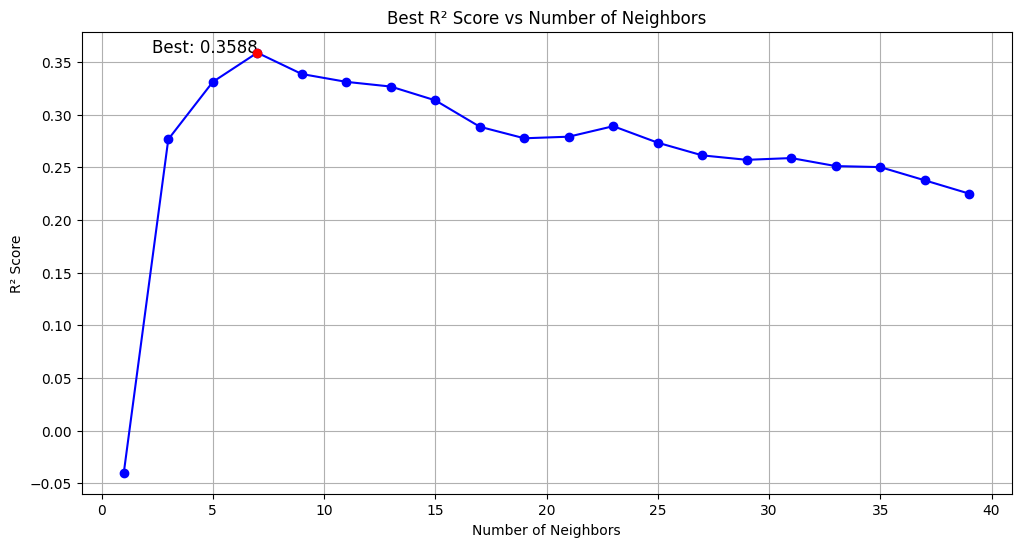

Best R² score: 0.3588, number of k-folds: 4, number of neighbors: 7


In [34]:
# Not applying PCA to the data and applying the KNN Regressor
results = []

# Varying both the n_folds and n_neighbors
for n_fold in n_folds:
    kf = KFold(n_splits=n_fold)
    for k in n_neighbors:
        knn = KNeighborsRegressor(n_neighbors=k)
        score = cross_val_score(knn, X, y, cv=kf, scoring='r2').mean()  # Use r^2 as the scoring metric
        results.append([n_fold, k, score])  # Store the score
        
df_results = pd.DataFrame(results, columns=['n_folds', 'n_neighbors', 'r2_score'])

# Find the best result for each value of n_neighbors
best_results_per_neighbor = df_results.loc[df_results.groupby('n_neighbors')['r2_score'].idxmax()]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(best_results_per_neighbor['n_neighbors'], best_results_per_neighbor['r2_score'], marker='o', linestyle='-', color='b')

# Highlight the best overall result
best_result = best_results_per_neighbor.loc[best_results_per_neighbor['r2_score'].idxmax()]
plt.scatter(best_result['n_neighbors'], best_result['r2_score'], color='red', zorder=5)
plt.text(best_result['n_neighbors'], best_result['r2_score'], f'Best: {best_result["r2_score"]:.4f}', fontsize=12, ha='right')

plt.xlabel('Number of Neighbors')
plt.ylabel('R² Score')
plt.title('Best R² Score vs Number of Neighbors')
plt.grid(True)
plt.show()

# Extracting the best results
best_result = max(results, key=lambda x: x[2])  # Select the configuration with the highest r^2 score
print(f'Best R² score: {best_result[2]:.4f}, number of k-folds: {best_result[0]}, number of neighbors: {best_result[1]}')

### KNN changing only the n_neighbors

In [ ]:
# Not applying PCA to the data and applying the KNN Regressor
results = []

# Separate the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Varying only the n_neighbors
for k in n_neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)  # Use r^2 as the scoring metric
    results.append([k, score])  # Store the score
    
df_results = pd.DataFrame(results, columns=['n_neighbors', 'r2_score'])

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_results['n_neighbors'], df_results['r2_score'], marker='o', linestyle='-', color='b')

# Highlight the best overall result
best_result = df_results.loc[df_results['r2_score'].idxmax()]
plt.scatter(best_result['n_neighbors'], best_result['r2_score'], color='red', zorder=5)
plt.text(best_result['n_neighbors'], best_result['r2_score'], f'Best: {best_result["r2_score"]:.4f}', fontsize=12, ha='right')

plt.xlabel('Number of Neighbors')
plt.ylabel('R² Score')
plt.title('Best R² Score vs Number of Neighbors')
plt.grid(True)
plt.show()

# Extracting the best results
best_result = max(results, key=lambda x: x[1])  # Select the configuration with the highest r^2 score
print(f'Best R² score: {best_result[1]:.4f}, number of neighbors: {best_result[0]}')